# Replikation af artikel "Delta force: Option pricing with differential machine learning" kapitel 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math 
import pandas as pd
import random
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.rcParams['figure.figsize'] = [8, 6]

## Bachelier Model

$$
C = \left(S-Ke^{-r(T-t)}\right)
\Phi\left({z}\right) + \sigma  \sqrt{\frac{1-e^{-2r(T-t)}}{2r}}
\phi\left(z \right)
$$
hvor
$$
z = \frac{S-Ke^{-r(T-t)}}{\sigma \sqrt{\frac{1-e^{-2r(T-t)}}{2r}}}
$$

### Når r = 0

In [2]:
def bachelier_0_Price(sigma, S, K, T, t):
    z = (S - K)/(sigma*np.sqrt(T-t))
    c = (S - K)*norm.cdf(z) + sigma * np.sqrt(T-t)* norm.pdf(z)
    
    #Bemærkning: bemærk forskel mellem stor og lille phi.
    
    return c

In [3]:
def bachelier_0_Delta(sigma, S, K, T, t):
    z = (S - K)/(sigma*np.sqrt(T-t))    
    #Bemærkning: bemærk forskel mellem stor og lille phi.
    
    return norm.cdf(z)

In [4]:
S0 = 1
K = 1
sigma = 0.2
T = 1
t = 0
N = 1000

In [5]:
TruePrice = bachelier_0_Price(sigma, S0, K, T,t)

Note: Antallet af grader på polynomiet givet ved p = M - 1

In [6]:
random.seed(1)
M = 8
Powers = np.array(range(M))
Powers1 = Powers -1 

In [7]:
Matrix =[]

for i in range(len(Powers)):
    Matrix.append(0)
    
CoefMatrix = pd.concat([pd.DataFrame(Matrix).T]*N).T

In [8]:
Sim1 = np.random.normal(0,1,N)
Sim2 = np.random.normal(0,1,N)
Sim3 = np.random.normal(0,1,N)
S1 = S0+sigma*np.sqrt(T)*Sim1
S2 = S1+sigma*np.sqrt(T)*Sim2
S3 = S1+sigma*np.sqrt(T)*Sim3

CallPayoff = []
for i in range(N):
    if S2[i] > K:
        CallPayoff.append(S2[i]-K)
    else: 
        CallPayoff.append(0)
        
        
CallDelta = (S3 >K)

In [9]:
CallDeltaliste = []
for i in range(len(CallDelta)):
    if CallDelta[i] == True:
        CallDeltaliste.append(1)
    else:
        CallDeltaliste.append(0)

In [10]:
X1 = S1**0
X2 = (0 * S1)
dummy = np.std(CallPayoff)/np.std(CallDelta)
w = 0.00000000000001 # Delta regularization
w1 = 0.5 # Half/Half
w2 = 1 # Price /normal regularization

In [11]:
S1d = pd.DataFrame(S1.tolist())
X1d = pd.DataFrame(X1.tolist())
X2d = pd.DataFrame(X2.tolist())

In [12]:
list_of_data = []
for i in range(1,len(Powers)):
    list_of_data.append(pd.concat([X1d,S1d**Powers[i]], axis = 1))
    
list1 =[]
for i in range(0, len(list_of_data)):
    list1.append(list_of_data[i][0].iloc[:,1])
    
X1 = pd.concat([list_of_data[0],list1[1], list1[2], list1[3], list1[4], list1[5], list1[6]], axis = 1)

In [13]:
list_of_data = []
for i in range(1,len(Powers)):
    list_of_data.append(pd.concat([X2d,Powers[i]*S1d**(Powers1[i])], axis = 1))
    
list1 =[]
for i in range(0, len(list_of_data)):
    list1.append(list_of_data[i][0].iloc[:,1])
    
X2 = pd.concat([list_of_data[0],list1[1], list1[2], list1[3], list1[4], list1[5], list1[6]], axis = 1)

In [14]:
OLSCoef=np.dot(np.linalg.inv(np.dot(w*np.transpose(X1),X1)+(1-w)*(np.dot(np.transpose(X2),X2))),(w*np.dot(np.transpose(X1),CallPayoff)+(1-w)*np.dot(np.transpose(X2),CallDelta)))

OLSCoef1=np.dot(np.linalg.inv(np.dot(w1*np.transpose(X1),X1)+(1-w1)*(np.dot(np.transpose(X2),X2))),(w1*np.dot(np.transpose(X1),CallPayoff)+(1-w1)*np.dot(np.transpose(X2),CallDelta)))

OLSCoef2=np.dot(np.linalg.inv(np.dot(w2*np.transpose(X1),X1)+(1-w2)*(np.dot(np.transpose(X2),X2))),(w2*np.dot(np.transpose(X1),CallPayoff)+(1-w2)*np.dot(np.transpose(X2),CallDelta)))

#OLSCoef2=np.dot(np.linalg.inv(np.dot(np.transpose(X1),X1)),np.dot(np.transpose(X1),CallDelta))


In [15]:
S_vec = np.arange(0.5,1.5,1/N)

TrueCallDelta = bachelier_0_Delta(sigma, S_vec, K, T, t)

In [16]:
Powers = np.array(Powers)
Powers1 = Powers-1

In [17]:
DeltaCallDelta = []
for i in range(0, len(S_vec)):
    DeltaCallDelta.append((np.transpose(pd.DataFrame((np.array(pd.DataFrame(Powers)*pd.DataFrame(OLSCoef))))*(pd.DataFrame(S_vec[i]**(np.array(Powers1))))).sum(axis=1)))

In [18]:
HalfCallDelta = []
for i in range(0, len(S_vec)):
    HalfCallDelta.append((np.transpose(pd.DataFrame((np.array(pd.DataFrame(Powers)*pd.DataFrame(OLSCoef1))))*(pd.DataFrame(S_vec[i]**(np.array(Powers1))))).sum(axis=1)))

In [19]:
PriceCallDelta = []
for i in range(0, len(S_vec)):
    PriceCallDelta.append((np.transpose(pd.DataFrame((np.array(pd.DataFrame(Powers)*pd.DataFrame(OLSCoef2))))*(pd.DataFrame(S_vec[i]**(np.array(Powers1))))).sum(axis=1)))

In [20]:
data1 = pd.DataFrame(list(zip(S_vec,TrueCallDelta, DeltaCallDelta,HalfCallDelta,PriceCallDelta)), columns =['Stock Price','TrueCallDelta', 'DeltaCallDelta','HalfCallDelta','PriceCallDelta']) 
StockPrice = data1.iloc[:, 0:1].values
TrueDeltas = data1.iloc[:, 1:2].values
DeltaDeltas = data1.iloc[:, 2:3].values
HalfDeltas = data1.iloc[:, 3:4].values
PriceDeltas = data1.iloc[:, 4:5].values

### Calculate MSE n-grad

In [21]:
MSE_Deltaonly = []
for i in range(0, N):
    MSE_Deltaonly.append((TrueDeltas[i] - DeltaCallDelta[i])**2)

MSE_HalfHalf = []
for i in range(0, N):
    MSE_HalfHalf.append((TrueDeltas[i] - HalfCallDelta[i])**2)

MSE_Price_only = []
for i in range(0, N):
    MSE_Price_only.append(sum(TrueDeltas[i] - PriceCallDelta[i])**2)

In [22]:
print("Delta only")
print(np.mean(MSE_Deltaonly))

print('Half/Half')
print(np.mean(MSE_HalfHalf))

print('Price only')
print(np.mean(MSE_Price_only))

Delta only
0.00010068270448692264
Half/Half
9.767996198550616e-05
Price only
0.0037250708042901736


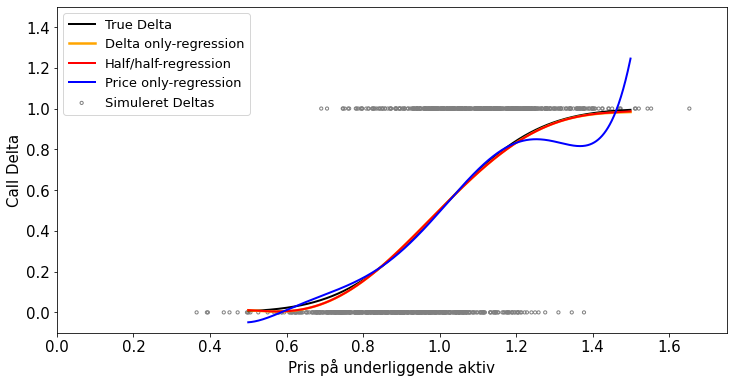

In [23]:
fig, ax = plt.subplots(figsize=(12, 6))

plt.scatter(S1,CallDeltaliste,s=10,color = "grey", facecolors = 'none',label='Simuleret Deltas')
plt.plot(StockPrice,TrueDeltas, color = "black",label='True Delta', linewidth=2)
plt.plot(StockPrice,DeltaDeltas, color = "orange",label='Delta only-regression', linewidth=2.5)
plt.plot(StockPrice,HalfDeltas, color = "red",label='Half/half-regression',linewidth=2)
plt.plot(StockPrice,PriceDeltas, color = "blue",label='Price only-regression', linewidth=2)
plt.legend(fontsize=13, loc = "upper left")
plt.xlabel("Pris på underliggende aktiv",fontsize=15)
plt.ylabel("Call Delta",fontsize=15)
plt.xlim([0, 1.75])
plt.ylim([-0.1, 1.5])
plt.show()

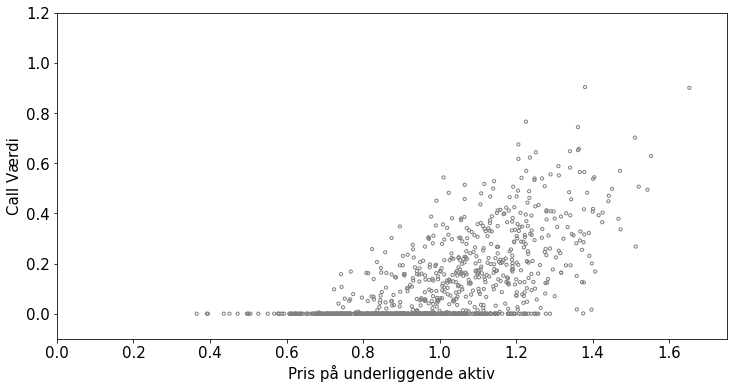

In [24]:
S_vec1 = np.arange(0,2,0.0001)

TrueCallPrice = bachelier_0_Price(sigma, S_vec1, K, T, t)

fig, ax = plt.subplots(figsize=(12, 6))

plt.scatter(S1,CallPayoff,s=10,color = "grey", facecolors = 'none')
plt.xlabel("Pris på underliggende aktiv",fontsize=15)
plt.ylabel("Call Værdi",fontsize=15)
plt.xlim([0.0, 1.75])
plt.ylim([-0.1, 1.2])
plt.show()

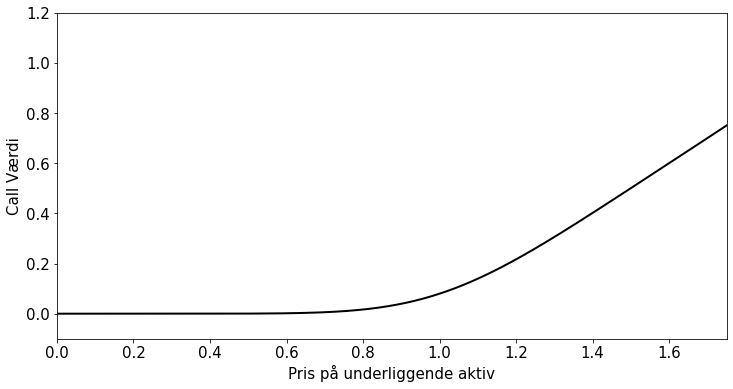

In [25]:
S_vec1 = np.arange(0,2,0.0001)

TrueCallPrice = bachelier_0_Price(sigma, S_vec1, K, T, t)

fig, ax = plt.subplots(figsize=(12, 6))

plt.plot(S_vec1,TrueCallPrice, color = "black", linewidth=2)
plt.xlabel("Pris på underliggende aktiv",fontsize=15)
plt.ylabel("Call Værdi",fontsize=15)
plt.xlim([0.0, 1.75])
plt.ylim([-0.1, 1.2])
plt.show()

In [26]:
# Importing the dataset
data11 = pd.DataFrame(list(zip(S1, CallPayoff)), columns =['S1', 'CallPayoff']) 
data22 = data11.sort_values(by=['S1'])
S11 = data22.iloc[:, 0:1].values
CallPayoff1 = data22.iloc[:, 1:2].values

In [27]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(S11, CallPayoff1)

LinearRegression()

In [28]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=7)
X_poly = poly_reg.fit_transform(S11)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, CallPayoff1)

LinearRegression()

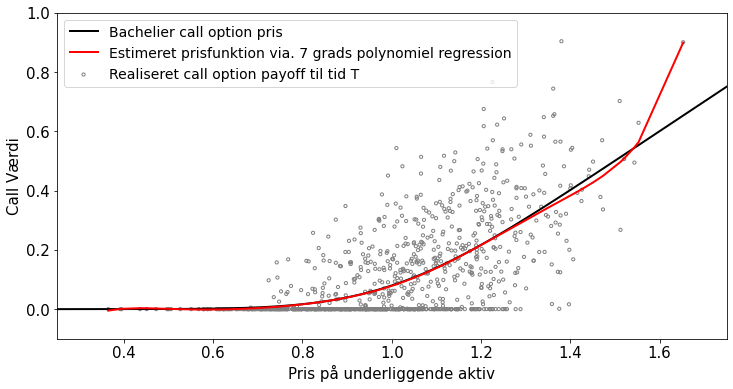

In [29]:
S_vec1 = np.arange(0,2,0.0001)

TrueCallPrice = bachelier_0_Price(sigma, S_vec1, K, T, t)

fig, ax = plt.subplots(figsize=(12, 6))

plt.scatter(S1,CallPayoff,s=10,color = "grey", facecolors = 'none',label='Realiseret call option payoff til tid T')
plt.plot(S_vec1,TrueCallPrice, color = "black",label='Bachelier call option pris',linewidth=2)
plt.plot(S11, pol_reg.predict(poly_reg.fit_transform(S11)), color='red',label="Estimeret prisfunktion via. 7 grads polynomiel regression",linewidth=2)
plt.legend(fontsize=14, loc = "upper left")
plt.xlabel("Pris på underliggende aktiv",fontsize=15)
plt.ylabel("Call Værdi",fontsize=15)
plt.xlim([0.25, 1.75])
plt.ylim([-0.1, 1])
plt.show()

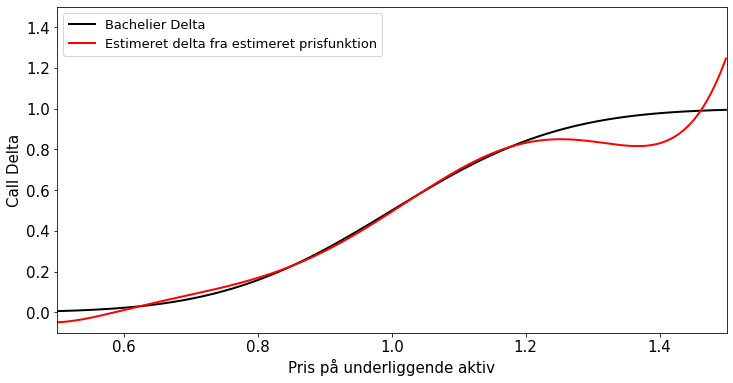

In [30]:
fig, ax = plt.subplots(figsize=(12, 6))

plt.plot(StockPrice,TrueDeltas, color = "black",label='Bachelier Delta', linewidth=2)
plt.plot(StockPrice,PriceDeltas, color = "red",label='Estimeret delta fra estimeret prisfunktion', linewidth=2)
plt.legend(fontsize=13, loc = "upper left")
plt.xlabel("Pris på underliggende aktiv",fontsize=15)
plt.ylabel("Call Delta",fontsize=15)
plt.xlim([0.5, 1.5])
plt.ylim([-0.1, 1.5])
plt.show()

### Tabel 5 : MSE vs. sim. regressioner

In [31]:
Simulering = [1000,2000,3000,4000,5000,10000]
#3. Grads
Deltaonly3 = [0.007917,0.006063,0.007753,0.007636,0.005652,0.006627]
HalfHalf3 = [0.007976,0.006058,0.007743,0.007583,0.005655,0.006624]
Priceonly3 = [0.013899,0.0079050,0.008181,0.014295,0.009082,0.006486]

#4.Grads
Deltaonly4 = [0.00112, 0.000850,0.000315,0.000596,0.000568, 0.000497]
HalfHalf4 = [0.001073,0.0008167,0.000317,0.0005859,0.000575,0.0004945]
Priceonly4 = [0.0019713,0.001440,0.000629,0.001792,0.003080,0.0004757]

#6.Grads
Deltaonly6 = [0.000356,0.000629,0.0004309,0.000377,0.00011,0.0000747]
HalfHalf6 = [0.0003617,0.0006174,0.0004652,0.000370,0.000107,0.0000756]
Priceonly6 = [0.003165,0.0047757,0.007609,0.0031305,0.002006,0.002797]

#7.Grads
Deltaonly7 = [0.000251,0.000274,0.000161,0.0001310,0.000203,0.000193]
HalfHalf7 = [0.000263,0.000284,0.000165,0.000133,0.000181,0.000188]
Priceonly7 = [0.00490,0.02470,0.00518,0.004637,0.002916,0.00293]

### Figur 25

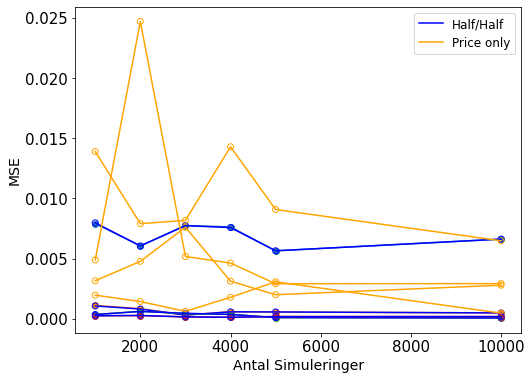

In [32]:
#3. Grads
plt.scatter(Simulering, Deltaonly3)
plt.plot(Simulering, Deltaonly3)
plt.scatter(Simulering, HalfHalf3, color = 'blue',facecolors = 'none')
plt.plot(Simulering, HalfHalf3, label = 'Half/Half', color = 'blue')
plt.scatter(Simulering, Priceonly3,color = 'orange',facecolors = 'none')
plt.plot(Simulering, Priceonly3, label = 'Price only', color = 'orange')

#4. Grads
plt.scatter(Simulering, Deltaonly4)
plt.plot(Simulering, Deltaonly4)
plt.scatter(Simulering, HalfHalf4,color = 'blue',facecolors = 'none')
plt.plot(Simulering, HalfHalf4, color = 'blue')
plt.scatter(Simulering, Priceonly4,color = 'orange',facecolors = 'none')
plt.plot(Simulering, Priceonly4, color = 'orange')

#6. Grads
plt.scatter(Simulering, Deltaonly6)
plt.plot(Simulering, Deltaonly6)
plt.scatter(Simulering, HalfHalf6,color = 'blue',facecolors = 'none')
plt.plot(Simulering, HalfHalf6, color = 'blue')
plt.scatter(Simulering, Priceonly6, color = 'orange',facecolors = 'none')
plt.plot(Simulering, Priceonly6,color = 'orange')

#7. Grads
plt.scatter(Simulering, Deltaonly7)
plt.plot(Simulering, Deltaonly7)
plt.scatter(Simulering, HalfHalf7,color = 'blue',facecolors = 'none')
plt.plot(Simulering, HalfHalf7,color = 'blue')
plt.scatter(Simulering, Priceonly7, color = 'orange',facecolors = 'none')
plt.plot(Simulering, Priceonly7,color = 'orange')

plt.xlabel("Antal Simuleringer",fontsize=14)
plt.ylabel("MSE",fontsize=14)
plt.legend(fontsize=12, loc = "upper right")

In [33]:
T = 1
MM = 52
dt = T/MM

In [34]:
aT1 = []
for i in range(len(HalfCallDelta)):
    aT1.append(HalfCallDelta[i][0])

In [35]:
aT2 = []
for i in range(len(PriceCallDelta)):
    aT2.append(PriceCallDelta[i][0])

In [89]:
EstAfPris = pol_reg.predict(poly_reg.fit_transform(S11))

aT4 = []
for i in range(len(EstAfPris)):
    aT4.append(EstAfPris[i][0])

aT5 = []
for i in range(len(S11)):
    aT5.append(S11[i][0])

In [106]:
S_t = []
Hedge_Payoff = []
Option_Payoff = []
liste111 = []

for j in range(0,N):
    
    S = S1[j]
    
    if S2[j] >= K:
        STTT = S2[j]-K 
    else: 
        STTT = 0
    
    
    V = np.interp(S,aT5,aT4)
    a = np.interp(S,S_vec,aT1)
    b = V-a*S
    
    for i in range(0,52):
        eps = np.random.normal(0, 1)
        S = S+sigma*np.sqrt(dt)*eps
        V = a*S+b
        a = np.interp(S,S_vec,aT1)
        b = V-a*S
        
        
    S_t.append(S) # Samler alle aktiekurser til udløb
    Hedge_Payoff.append(V) # Samler alle værdier af porteføljer til udløb
    if S >= K:
        STT = S-K 
    else: 
        STT = 0 
    Option_Payoff.append(STT) # Samler payoff på alle call option

Error = np.array(Hedge_Payoff) - np.array(Option_Payoff)
np.std(Error)

0.02090265414652507

In [37]:
S_t = []
Hedge_Payoff = []
Option_Payoff = []

for j in range(0,N):
    
    S = S1[j]
    
    V = bachelier_0_Price(sigma, S, K, T, t)
    a = bachelier_0_Delta(sigma, S, K, T, t)
    b = V-a*S
    
    for i in range(0,52):
        eps = np.random.normal(0, 1)
        S = S+sigma*np.sqrt(dt)*eps
        V = a*S+b
        a = bachelier_0_Delta(sigma, S, K, T-i*dt, t)
        b = V-a*S
        
        
    S_t.append(S) # Samler alle aktiekurser til udløb
    Hedge_Payoff.append(V) # Samler alle værdier af porteføljer til udløb
    Option_Payoff.append(bachelier_0_Price(sigma, S, K, 0, 0))
    
Error = np.array(Hedge_Payoff) - np.array(Option_Payoff)
np.std(Error)

<ipython-input-2-1c14e5d101ab>:2: RuntimeWarning: divide by zero encountered in double_scalars
  z = (S - K)/(sigma*np.sqrt(T-t))


0.007406965851598876

In [38]:
Simulering1 = [250,500,1000,2000,3000,4000,5000,6000]
#3.Grads - Done
HedgeHalfHalf3 = [0.0285428,0.0287149,0.028027,0.027446,0.0276211,0.02750186,0.0274728,0.027742]
HedgePriceonly3 = [0.035029,0.0340221,0.0337523,0.02893969,0.02857232, 0.0290282,0.0291780,0.029802]

#4. Grads - Done
HedgeHalfHalf4 = [0.024426,0.023695,0.0223633,0.02070,0.021466,0.020410,0.020557,0.020946]
HedgePriceonly4 = [0.034470,0.027244,0.022736,0.023920,0.022856,0.022253,0.023330,0.023038]

#5.Grads - done
HedgeHalfHalf5 = [0.023689,0.0219601,0.02213,0.020686,0.021976,0.0204149,0.020552,0.020958]
HedgePriceonly5 = [0.033341,0.029562,0.0211149,0.029745,0.023836,0.022867,0.0231822,0.023455]

#6.Grads - done
HedgeHalfHalf6 = [0.0262617,0.0198528,0.021267,0.019126,0.021104,0.0189331,0.019270,0.0188711]
HedgePriceonly6 = [0.057281,0.0313617,0.0271948,0.025579,0.0245947, 0.0238681,0.0231778,0.0230622]

#7.Grads - Done
HedgeHalfHalf7 = [0.0265817,0.0209108,0.01965,0.020368,0.021110,0.018927,0.019263,0.019797]
HedgePriceonly7 = [0.041895,0.0472007,0.021439,0.025395,0.033736,0.024189,0.022691,0.024775]

#8.Grads - Done
HedgeHalfHalf8 = [0.0246399,0.0209646,0.02127,0.018978,0.021103,0.01850,0.018971,0.018351]
HedgePriceonly8 = [0.0386761,0.027989,0.024495,0.028279,0.029063,0.028458,0.025794,0.023848]

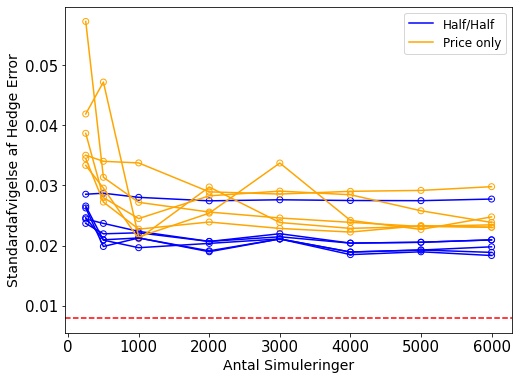

In [39]:
#3. Grads
plt.scatter(Simulering1, HedgeHalfHalf3, color = 'blue',facecolors = 'none')
plt.plot(Simulering1, HedgeHalfHalf3, label = 'Half/Half', color = 'blue')
plt.scatter(Simulering1, HedgePriceonly3,color = 'orange',facecolors = 'none')
plt.plot(Simulering1, HedgePriceonly3, label = 'Price only', color = 'orange')

#4. Grads
plt.scatter(Simulering1, HedgeHalfHalf4,color = 'blue',facecolors = 'none')
plt.plot(Simulering1, HedgeHalfHalf4, color = 'blue')
plt.scatter(Simulering1, HedgePriceonly4,color = 'orange',facecolors = 'none')
plt.plot(Simulering1, HedgePriceonly4, color = 'orange')

#5. Grads
plt.scatter(Simulering1, HedgeHalfHalf5,color = 'blue',facecolors = 'none')
plt.plot(Simulering1, HedgeHalfHalf5, color = 'blue')
plt.scatter(Simulering1, HedgePriceonly5,color = 'orange',facecolors = 'none')
plt.plot(Simulering1, HedgePriceonly5, color = 'orange')

#6. Grads
plt.scatter(Simulering1, HedgeHalfHalf6,color = 'blue',facecolors = 'none')
plt.plot(Simulering1, HedgeHalfHalf6, color = 'blue')
plt.scatter(Simulering1, HedgePriceonly6, color = 'orange',facecolors = 'none')
plt.plot(Simulering1, HedgePriceonly6,color = 'orange')

#7. Grads
plt.scatter(Simulering1, HedgeHalfHalf7,color = 'blue',facecolors = 'none')
plt.plot(Simulering1, HedgeHalfHalf7,color = 'blue')
plt.scatter(Simulering1, HedgePriceonly7, color = 'orange',facecolors = 'none')
plt.plot(Simulering1, HedgePriceonly7,color = 'orange')

#8. Grads
plt.scatter(Simulering1, HedgeHalfHalf8,color = 'blue',facecolors = 'none')
plt.plot(Simulering1, HedgeHalfHalf8, color = 'blue')
plt.scatter(Simulering1, HedgePriceonly8,color = 'orange',facecolors = 'none')
plt.plot(Simulering1, HedgePriceonly8, color = 'orange')

#True Delta line:
truedelta=[0.0077777,0.00831914,0.00790822,0.007953,0.0077184,0.008094]
plt.axhline(y=np.mean(truedelta), color='r', linestyle='--')

plt.xlabel("Antal Simuleringer",fontsize=14)
plt.ylabel("Standardafvigelse af Hedge Error",fontsize=14)
plt.legend(fontsize=12, loc = "upper right")